#0 Setup

###1.1.1 Drive 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/Sensors')

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/data


In [ ]:
import os
os.chdir('/content/drive/MyDrive/General Data Language/data/CheXpert')

###1.1.2 Library Loading

In [ ]:
import numpy as np
import pandas as pd
import copy
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import datetime
#from datetime import datetime, data
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
from numpy.random import seed
np.random.seed(2095)

In [ ]:
import glob
import seaborn as sns
from tqdm import tqdm

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import socket
hostname = socket.gethostname()
print(hostname)

673d0bfcef2f


# 1. CheXpert

##1.1 Data Extract

### 1.1.1 증상 Labeling

* 1. No Finding
* 2. Enlarge Cardiomediastumum
* 3. Cardiomegaly
* 4. Lung Opacity
* 5. Leng Lesion
* 6. Edema
* 7. Consolidation
* 8. Pneumonia
* 9. Atelectasis
* 10. Pneumothorax
* 11. Pleural Effusion
* 12. Pleural other
* 13. Fracture

### 1.1.2 증상 불러오기

In [ ]:
df_train = pd.read_csv('train.csv')
df_valid = pd.read_csv('valid.csv')

In [ ]:
df_all = pd.concat(map(pd.read_csv, ['train.csv','valid.csv']))

In [ ]:
df_all

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_all.info

<bound method DataFrame.info of                                                   Path  ... Support Devices
0    CheXpert-v1.0-small/train/patient00001/study1/...  ...             1.0
1    CheXpert-v1.0-small/train/patient00002/study2/...  ...             NaN
2    CheXpert-v1.0-small/train/patient00002/study1/...  ...             NaN
3    CheXpert-v1.0-small/train/patient00002/study1/...  ...             NaN
4    CheXpert-v1.0-small/train/patient00003/study1/...  ...             NaN
..                                                 ...  ...             ...
229  CheXpert-v1.0-small/valid/patient64736/study1/...  ...             1.0
230  CheXpert-v1.0-small/valid/patient64737/study1/...  ...             1.0
231  CheXpert-v1.0-small/valid/patient64738/study1/...  ...             1.0
232  CheXpert-v1.0-small/valid/patient64739/study1/...  ...             0.0
233  CheXpert-v1.0-small/valid/patient64740/study1/...  ...             0.0

[223648 rows x 19 columns]>

In [ ]:
len(df_all)

223648

### 1.1.3 동일환자_제거_전처리

In [ ]:
print(df_all.size)

4249312


In [ ]:
patient = []
for i in range(len(df_all)-1):
  patient_num = df_all['Path'].iloc[i].split('/')[2]
  patient_num2 = df_all['Path'].iloc[i+1].split('/')[2]
  print(df_all['Path'].iloc[i])
  if patient_num != patient_num2:
    patient.append(df_all.iloc[i])
    print('----------------')


Streaming output truncated to the last 5000 lines.
----------------
CheXpert-v1.0-small/train/patient62368/study1/view1_frontal.jpg
----------------
CheXpert-v1.0-small/train/patient62369/study1/view1_frontal.jpg
----------------
CheXpert-v1.0-small/train/patient62370/study1/view1_frontal.jpg
----------------
CheXpert-v1.0-small/train/patient62371/study1/view1_frontal.jpg
----------------
CheXpert-v1.0-small/train/patient62372/study1/view1_frontal.jpg
----------------
CheXpert-v1.0-small/train/patient62373/study1/view1_frontal.jpg
CheXpert-v1.0-small/train/patient62373/study2/view1_frontal.jpg
----------------
CheXpert-v1.0-small/train/patient62374/study1/view1_frontal.jpg
----------------
CheXpert-v1.0-small/train/patient62375/study1/view1_frontal.jpg
----------------
CheXpert-v1.0-small/train/patient62376/study1/view1_frontal.jpg
----------------
CheXpert-v1.0-small/train/patient62377/study1/view1_frontal.jpg
----------------
CheXpert-v1.0-small/train/patient62378/study1/view1_fronta

In [ ]:
p1 = pd.DataFrame(patient)

In [ ]:
p1

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Lateral,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
10,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,Frontal,AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,CheXpert-v1.0-small/valid/patient64735/study1/...,Female,63,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
p1.shape

(64739, 19)

In [ ]:
p1.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

##1.2 데이터 분석 1

In [ ]:
p1=pd.DataFrame(p1, columns=['Path', 'Sex', 'Age', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture'])

In [ ]:
p1.columns

Index(['Path', 'Sex', 'Age', 'No Finding', 'Enlarged Cardiomediastinum',
       'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation',
       'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other', 'Fracture'],
      dtype='object')

In [ ]:
p1.count()

Path                          64739
Sex                           64739
Age                           64739
No Finding                     9995
Enlarged Cardiomediastinum    15594
Cardiomegaly                  13145
Lung Opacity                  31503
Lung Lesion                    3920
Edema                         23867
Consolidation                 22061
Pneumonia                      8250
Atelectasis                   20187
Pneumothorax                  25599
Pleural Effusion              35141
Pleural Other                  1828
Fracture                       5043
dtype: int64

In [ ]:
p1['Sex'].value_counts(dropna = False)

Male       35916
Female     28822
Unknown        1
Name: Sex, dtype: int64

In [ ]:
p1.replace(-1.0, 1.0, inplace=True)
p1

,Path,Sex,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
10,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,CheXpert-v1.0-small/valid/patient64735/study1/...,Female,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p1.fillna(method = 'ffill').head()
p1

,Path,Sex,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
10,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,CheXpert-v1.0-small/valid/patient64735/study1/...,Female,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p1['Lung Opacity'].count()
#https://blog.naver.com/life4happy/222467295463
#https://jsc5565.tistory.com/32

31503

In [ ]:
p1 = p1.fillna(0)
p1

,Path,Sex,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,CheXpert-v1.0-small/valid/patient64735/study1/...,Female,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
p1.describe()

,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture
count,64739.000000,64739.000000,64739.000000,64739.000000,64739.000000,64739.000000,64739.000000,64739.000000,64739.000000,64739.000000,64739.000000,64739.000000,64739.000000,64739.000000
mean,60.352091,0.151717,0.100079,0.139406,0.447659,0.050495,0.258376,0.173728,0.110876,0.303310,0.073433,0.336938,0.024205,0.052302
std,18.588969,0.358749,0.300107,0.346372,0.497257,0.218966,0.437745,0.378879,0.313981,0.459692,0.260848,0.472667,0.153686,0.222638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
##https://github.com/AmitHasanShuvo/Prediction-of-Clinical-Risk-Factors-of-Diabetes-Using-ML-Resolving-Class-Imbalance/blob/main/Diabetics%20Prediction%20(ML)%20CV%3D5.ipynb

In [ ]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64739 entries, 0 to 232
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Path                        64739 non-null  object 
 1   Sex                         64739 non-null  object 
 2   Age                         64739 non-null  int64  
 3   No Finding                  64739 non-null  float64
 4   Enlarged Cardiomediastinum  64739 non-null  float64
 5   Cardiomegaly                64739 non-null  float64
 6   Lung Opacity                64739 non-null  float64
 7   Lung Lesion                 64739 non-null  float64
 8   Edema                       64739 non-null  float64
 9   Consolidation               64739 non-null  float64
 10  Pneumonia                   64739 non-null  float64
 11  Atelectasis                 64739 non-null  float64
 12  Pneumothorax                64739 non-null  float64
 13  Pleural Effusion            64739

##1.3 데이터 분석 2; 시각화


In [ ]:
p1.isnull().sum()

Path                          0
Sex                           0
Age                           0
No Finding                    0
Enlarged Cardiomediastinum    0
Cardiomegaly                  0
Lung Opacity                  0
Lung Lesion                   0
Edema                         0
Consolidation                 0
Pneumonia                     0
Atelectasis                   0
Pneumothorax                  0
Pleural Effusion              0
Pleural Other                 0
Fracture                      0
dtype: int64

In [ ]:
age_n_sex = df_all[['Age', 'Sex']]
age_n_sex

,Age,Sex
0,68,Female
1,87,Female
2,83,Female
3,83,Female
4,41,Male
...,...,...
229,57,Female
230,65,Male
231,71,Male
232,45,Female


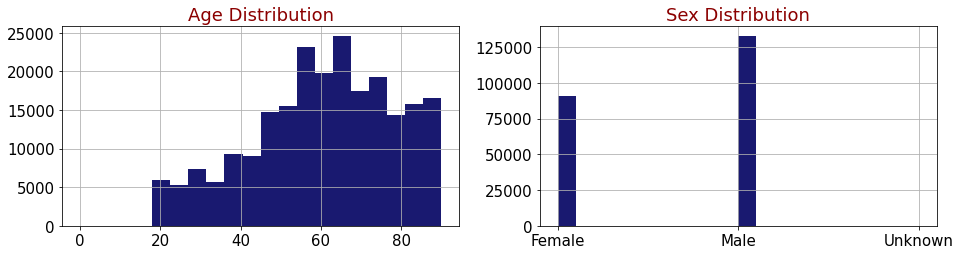

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(age_n_sex,age_n_sex.columns,6,3)

In [ ]:
#import statsmodels.api as sm
#import pandas
#from patsy import dmatrices
#logit_model = sm.OLS(df_train, df_valid)
#p_p = logit_model.fit()
#print(p_p.summary2())

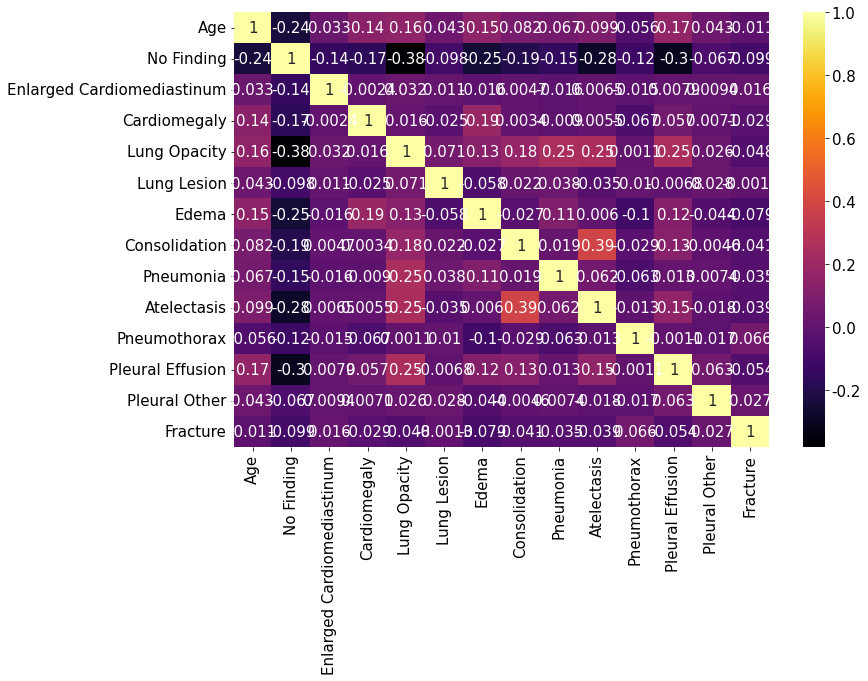

In [ ]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(p1.corr(),cmap='inferno', annot=True)

In [ ]:
p1_p1 = pd.DataFrame(p1, columns=['Sex', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture'])

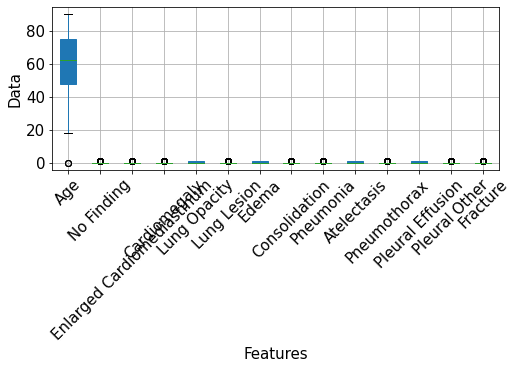

In [ ]:
plt.subplots(figsize=(8,3))
p1.boxplot(notch=False, patch_artist=True)
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(p1)
df_constant.head()

,const,Path,Sex,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture
0,1.0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


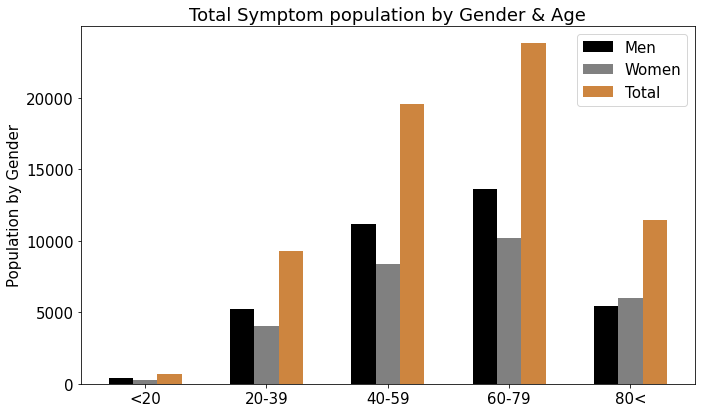

In [ ]:
labels = ['<20', '20-39', '40-59', '60-79', '80<']
men = []
women = []
total = []

men.append(p1[(p1['Sex'] == 'Male') & (p1['Age']<20)].shape[0])
men.append(p1[(p1['Sex'] == 'Male') & (p1['Age']>=20) & (p1['Age'] < 40)].shape[0])
men.append(p1[(p1['Sex'] == 'Male') & (p1['Age']>=40) & (p1['Age'] < 60)].shape[0])
men.append(p1[(p1['Sex'] == 'Male') & (p1['Age']>=60) & (p1['Age'] < 80)].shape[0])
men.append(p1[(p1['Sex'] == 'Male') & (p1['Age']>=80)].shape[0])

women.append(p1[(p1['Sex'] == 'Female') & (p1['Age']<20)].shape[0])
women.append(p1[(p1['Sex'] == 'Female') & (p1['Age']>=20) & (p1['Age'] < 40)].shape[0])
women.append(p1[(p1['Sex'] == 'Female') & (p1['Age']>=40) & (p1['Age'] < 60)].shape[0])
women.append(p1[(p1['Sex'] == 'Female') & (p1['Age']>=60) & (p1['Age'] < 80)].shape[0])
women.append(p1[(p1['Sex'] == 'Female') & (p1['Age']>=80)].shape[0])

for i in range(len(men)):
  total.append(men[i]+women[i])


x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))
bar1 = ax.bar(x - width, men, width, label='Men', color='k')
bar2 = ax.bar(x, women, width, label='Women', color = 'grey')
bar3 = ax.bar(x + width, total, width, label='Total', color = 'peru')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population by Gender')
ax.set_title('Total Symptom population by Gender & Age')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
print(p1.columns)

Index(['Path', 'Sex', 'Age', 'No Finding', 'Enlarged Cardiomediastinum',
       'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation',
       'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other', 'Fracture'],
      dtype='object')


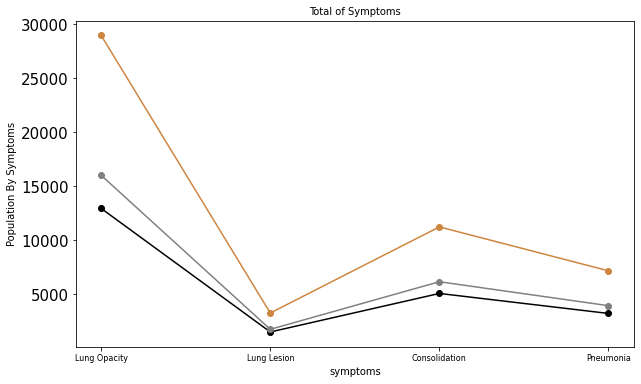

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6), dpi= 72)

symptoms_chx = list(['Lung Opacity', 'Lung Lesion', 'Consolidation', 'Pneumonia'])

# print(p1[(p1['Sex']=='Female')][symptoms_chx])
#
# p1[(p1['Sex']=='Male')]
womenSymptoms = []
menSymptoms = []
totalSymptoms = []

for i in range(len(symptoms_chx)):
  menSymptoms.append(p1[(p1['Sex']=='Male') & (p1[symptoms_chx[i]] == 1.0)].shape[0])
  womenSymptoms.append(p1[(p1['Sex']=='Female') & (p1[symptoms_chx[i]] == 1.0)].shape[0])
  totalSymptoms.append(menSymptoms[i] + womenSymptoms[i])

Total = list(p1.value_counts())

plt.xlabel('symptoms', fontsize = 10)
ax.set_xticklabels(symptoms_chx,fontsize=8)
plt.ylabel('Population By Symptoms', fontsize = 10)
plt.title("Total of Symptoms", fontsize = 10)

plt.plot(symptoms_chx, womenSymptoms, marker = 'o', color='k')
plt.plot(symptoms_chx, menSymptoms, marker = 'o', color = 'grey')
plt.plot(symptoms_chx, totalSymptoms, marker = 'o', color = 'peru')

plt.show()

# 2. Respiratory Symptoms and Treatment

##2.1 Data Extract

In [ ]:
df_sym = pd.read_csv('respiratory symptoms and treatment.csv')

In [ ]:
df_sym

,Symptoms,Age,Sex,Disease,Treatment,Nature
0,coughing,5.0,female,Asthma,Omalizumab,high
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,high
2,wheezing,6.0,male,Asthma,Mepolizumab,high
3,shortness of breath,7.0,male,Asthma,Mepolizumab,high
4,shortness of breath,9.0,male,Asthma,Mepolizumab,high
...,...,...,...,...,...,...
38532,A cough that lasts more than three weeks,45.0,female,Tuberculosis,ethambutol,high
38533,Loss of appetite and unintentional weight loss,43.0,female,Tuberculosis,ethambutol,high
38534,Fever,41.0,female,Tuberculosis,ethambutol,high
38535,Chills,53.0,female,Tuberculosis,ethambutol,high


In [ ]:
df_sym.shape

(38537, 6)

##2.2 데이터 분석

In [ ]:
df_sym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38537 entries, 0 to 38536
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symptoms   37841 non-null  object 
 1   Age        38195 non-null  float64
 2   Sex        37615 non-null  object 
 3   Disease    38197 non-null  object 
 4   Treatment  35696 non-null  object 
 5   Nature     36347 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.8+ MB


In [ ]:
df_sym.describe()

,Age
count,38195.000000
mean,36.997356
std,27.713575
min,1.000000
25%,12.000000
50%,30.000000
75%,63.000000
max,98.000000


In [ ]:
df_sym['Symptoms'].value_counts()

shortness of breath              3005
chest pain                       2112
cold                             1736
Wheezing                         1535
Fatigue                          1392
                                 ... 
 coughing                          25
 coughing                          25
Chest tightness or chest pain      24
Shortness of breath                24
Persistent dry cough               24
Name: Symptoms, Length: 92, dtype: int64

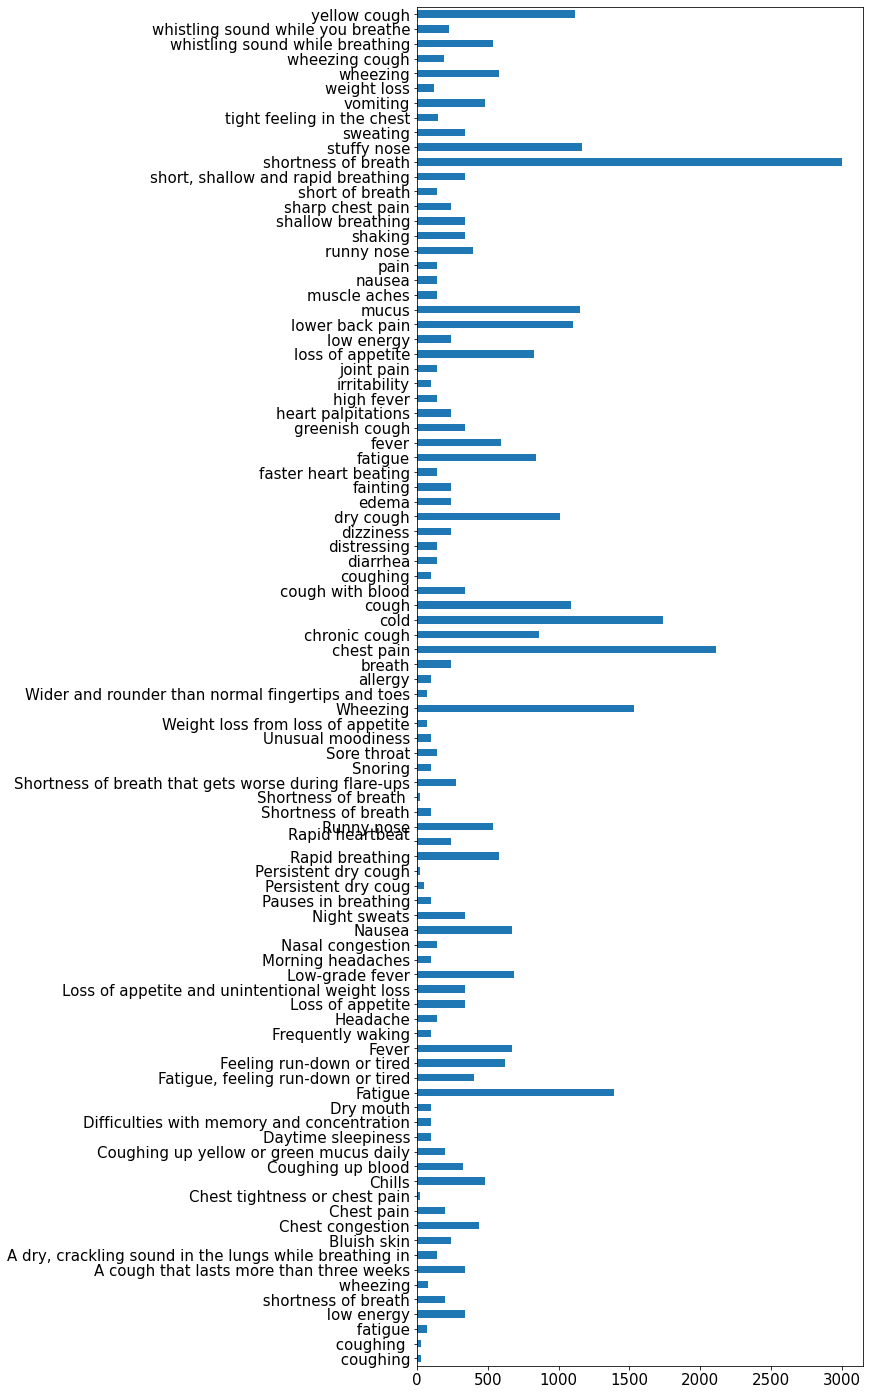

In [ ]:
df_sym['Symptoms'].value_counts().sort_index().plot.barh(figsize=(8,25))

In [ ]:
sym = df_sym[['Age', 'Sex', 'Nature']]
sym

,Age,Sex,Nature
0,5.0,female,high
1,4.0,female,high
2,6.0,male,high
3,7.0,male,high
4,9.0,male,high
...,...,...,...
38532,45.0,female,high
38533,43.0,female,high
38534,41.0,female,high
38535,53.0,female,high


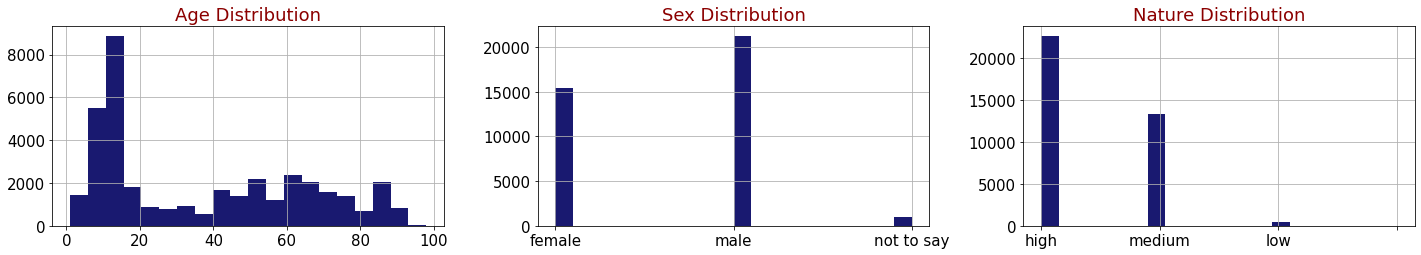

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(sym,sym.columns,6,3)

In [ ]:
#plt.subplots(figsize=(8,3))
#p1.boxplot(notch=False, patch_artist=True)
#plt.xlabel('Features')
#plt.ylabel('Data')
#plt.xticks(rotation=45)
#plt.show()

#sns.boxplot(x = 'Gender', y = 'Nature', data=sym, hue='Gender')

# 3. RANZCR CLiP - Add NIH Chest X-rays TFRecords
- 체스퍼트와 비슷한 데이터 (11만개); 가공할 것 많음


##3.1 Data Extract

In [ ]:
#RANZCR CLiP - Add NIH Chest X-rays TFRecords

### 3.1.1 증상 Labeling

In [ ]:
#https://www.kaggle.com/nickuzmenkov/ranzcr-clip-add-nih-chest-x-rays-tfrecords/notebook

* No Finding
* Atelectasis
* Consolidation
* Infiltration
* Pneumothorax
* Edema
* Emphysema
* Fibrosis
* Effusion
* Pneumonia
* Pleural_Thickening
* Cardiomegaly
* Nodule
* Mass
* Hernia

In [ ]:
p2 = pd.read_csv('preprocessed_data.csv')
p2

,Path,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,../input/data/images_001/images/00000001_000.png,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,../input/data/images_001/images/00000001_001.png,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,../input/data/images_001/images/00000001_002.png,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
3,../input/data/images_001/images/00000002_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,../input/data/images_001/images/00000003_000.png,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,../input/data/images_012/images/00030801_001.png,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
112116,../input/data/images_012/images/00030802_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
112117,../input/data/images_012/images/00030803_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
112118,../input/data/images_012/images/00030804_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


###3.1.2 RANZCR CLiP__동일환자_전처리

In [ ]:
len(p2)

112120

In [ ]:
patient2 = []
for i in range(len(p2)-1):
  patient2_num1 = p2['Path'].iloc[i].split('/')[5].split('_')[0]
  patient2_num2 = p2['Path'].iloc[i+1].split('/')[5].split('_')[0]
  print(p2['Path'].iloc[i])
  if patient2_num1 != patient2_num2:
    patient2.append(p2.iloc[i])
    print('----------------')

Streaming output truncated to the last 5000 lines.
----------------
../input/data/images_012/images/00029426_000.png
----------------
../input/data/images_012/images/00029427_000.png
----------------
../input/data/images_012/images/00029428_000.png
../input/data/images_012/images/00029428_001.png
----------------
../input/data/images_012/images/00029429_000.png
----------------
../input/data/images_012/images/00029430_000.png
----------------
../input/data/images_012/images/00029431_000.png
../input/data/images_012/images/00029431_001.png
../input/data/images_012/images/00029431_002.png
../input/data/images_012/images/00029431_003.png
----------------
../input/data/images_012/images/00029432_000.png
----------------
../input/data/images_012/images/00029433_000.png
../input/data/images_012/images/00029433_001.png
../input/data/images_012/images/00029433_002.png
../input/data/images_012/images/00029433_003.png
../input/data/images_012/images/00029433_004.png
../input/data/images_012/imag

In [ ]:
p2 = pd.DataFrame(patient2)

In [ ]:
p2

,Path,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
2,../input/data/images_001/images/00000001_002.png,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
3,../input/data/images_001/images/00000002_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,../input/data/images_001/images/00000003_007.png,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
12,../input/data/images_001/images/00000004_000.png,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
20,../input/data/images_001/images/00000005_007.png,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112113,../input/data/images_012/images/00030800_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
112115,../input/data/images_012/images/00030801_001.png,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
112116,../input/data/images_012/images/00030802_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
112117,../input/data/images_012/images/00030803_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# True = 1, False = 0 변환
p2_1 = p2.iloc[:, 1:-1].astype(int)
p2_1

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass
2,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,1,1
20,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112113,1,0,0,0,0,0,0,0,0,0,0,0,0,0
112115,0,0,0,0,0,0,0,0,0,1,0,0,0,1
112116,1,0,0,0,0,0,0,0,0,0,0,0,0,0
112117,1,0,0,0,0,0,0,0,0,0,0,0,0,0


##3.2 데이터 분석 1

In [ ]:
p2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30804 entries, 2 to 112118
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   No Finding          30804 non-null  int64
 1   Atelectasis         30804 non-null  int64
 2   Consolidation       30804 non-null  int64
 3   Infiltration        30804 non-null  int64
 4   Pneumothorax        30804 non-null  int64
 5   Edema               30804 non-null  int64
 6   Emphysema           30804 non-null  int64
 7   Fibrosis            30804 non-null  int64
 8   Effusion            30804 non-null  int64
 9   Pneumonia           30804 non-null  int64
 10  Pleural_Thickening  30804 non-null  int64
 11  Cardiomegaly        30804 non-null  int64
 12  Nodule              30804 non-null  int64
 13  Mass                30804 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [ ]:
p2_1.describe()

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass
count,30804.000000,30804.000000,30804.000000,30804.000000,30804.000000,30804.00000,30804.000000,30804.000000,30804.000000,30804.000000,30804.000000,30804.000000,30804.000000,30804.000000
mean,0.660661,0.068952,0.019121,0.130503,0.013245,0.00672,0.009479,0.017563,0.065284,0.008083,0.025549,0.023893,0.050610,0.038891
std,0.473493,0.253377,0.136952,0.336861,0.114324,0.08170,0.096901,0.131357,0.247030,0.089545,0.157787,0.152718,0.219204,0.193338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
p2_1.corr()

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass
No Finding,1.000000,-0.379717,-0.194813,-0.540565,-0.161657,-0.114767,-0.136499,-0.186559,-0.368753,-0.125960,-0.225931,-0.218303,-0.322159,-0.280680
Atelectasis,-0.379717,1.000000,0.089240,0.074859,0.020025,0.012118,0.009079,0.036770,0.171855,0.052700,0.022521,0.016151,0.004970,0.032735
Consolidation,-0.194813,0.089240,1.000000,0.034576,0.029441,0.029136,0.010805,0.015620,0.097445,0.042989,0.037486,0.002991,0.048869,0.089618
Infiltration,-0.540565,0.074859,0.034576,1.000000,-0.001893,0.070759,-0.009057,0.020101,0.087607,0.056509,0.008120,-0.015177,0.042007,0.026747
Pneumothorax,-0.161657,0.020025,0.029441,-0.001893,1.000000,-0.006054,0.047276,0.016936,0.068241,-0.007288,0.028032,-0.012548,0.006932,0.031038
Edema,-0.114767,0.012118,0.029136,0.070759,-0.006054,1.000000,0.008356,-0.007972,0.061907,0.081326,-0.003245,0.028762,0.004575,0.022504
Emphysema,-0.136499,0.009079,0.010805,-0.009057,0.047276,0.008356,1.000000,0.007324,-0.002798,-0.005090,-0.005224,0.015407,-0.007303,0.011513
Fibrosis,-0.186559,0.036770,0.015620,0.020101,0.016936,-0.007972,0.007324,1.000000,0.013688,-0.006550,0.055100,0.000120,0.025503,0.017845
Effusion,-0.368753,0.171855,0.097445,0.087607,0.068241,0.061907,-0.002798,0.013688,1.000000,0.042186,0.095467,0.134201,0.049295,0.110654
Pneumonia,-0.125960,0.052700,0.042989,0.056509,-0.007288,0.081326,-0.005090,-0.006550,0.042186,1.000000,0.008360,0.004868,0.010582,0.011844


In [ ]:
p2_1.value_counts()

No Finding  Atelectasis  Consolidation  Infiltration  Pneumothorax  Edema  Emphysema  Fibrosis  Effusion  Pneumonia  Pleural_Thickening  Cardiomegaly  Nodule  Mass
1           0            0              0             0             0      0          0         0         0          0                   0             0       0       20351
0           0            0              1             0             0      0          0         0         0          0                   0             0       0        2586
            1            0              0             0             0      0          0         0         0          0                   0             0       0         991
            0            0              0             0             0      0          0         0         0          0                   0             1       0         802
                                                                                                1         0          0                   0      

## 3.3 데이터 분석2: 시각화

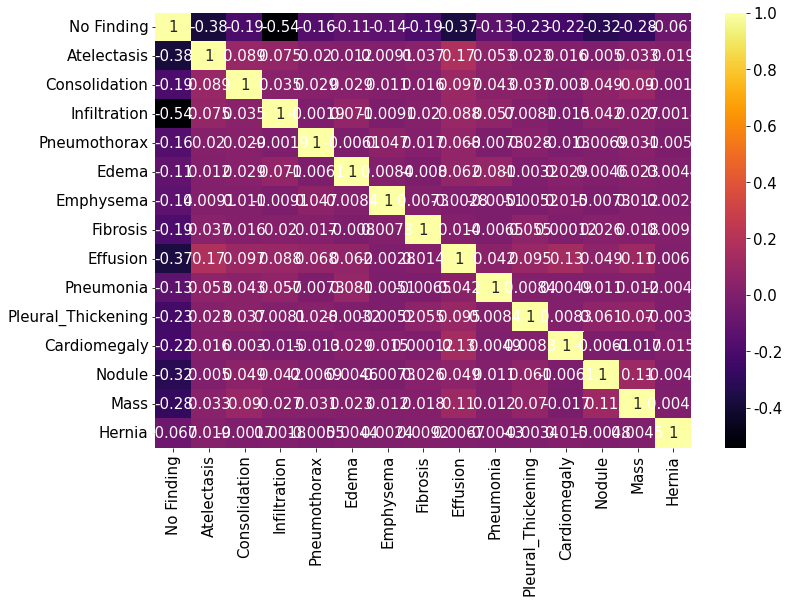

In [ ]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(p2.corr(),cmap='inferno', annot=True)

In [ ]:
# 그래프 비교

In [ ]:
# 남녀 비교

# 4. RSNA Pneumonia Detection Challenge
 - **Stage_2_detailed_class_info**
= RSNA Pneumonia Detection Challenge (3만개)

코로나 걸리면 어느 단계의 Pneumonia Opacities 에 속하나 (?)

## 4.1 Data Extract

In [ ]:
#https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

In [ ]:
s1 = pd.read_csv('stage2 detailed class info.csv')
s1

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity


In [ ]:
s1_1 = pd.DataFrame(s1, columns=['class'])
s1_1

,class
0,No Lung Opacity / Not Normal
1,No Lung Opacity / Not Normal
2,No Lung Opacity / Not Normal
3,Normal
4,Lung Opacity
...,...
30222,Lung Opacity
30223,Normal
30224,Normal
30225,Lung Opacity


##4.2 데이터 분석1

In [ ]:
s1.value_counts('class')

class
No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
dtype: int64

In [ ]:
s2 = s1.value_counts('class')
s2

class
No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
dtype: int64

In [ ]:
S2_nor = s2.value_counts('Normal')
S2_not = s2.value_counts('No Lung Opacity / Not Normal')
S2_lo = s2.value_counts('Lung Opacity')
s3 = s2
s3

class
No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
dtype: int64

In [ ]:
s1.corr()

""


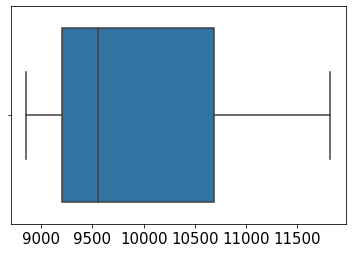

In [ ]:
#plt.subplots(figsize=(5,3))
#s2.boxplot(vert=True, patch_artist=True)
#plt.xlabel('Features')
#plt.ylabel('Data')
#plt.xticks(rotation=90)

#sns.boxplot(columns=['Lung Opacity', 'Normal', 'No Lung Opacity / Not Normal'])
#sns.boxplot(x=['S2_nor', 'S2_not', 'S2_lo'],
#            hue = s1['class'])

sns.boxplot(x = s2,
            hue = s1['class'])

# 5. MIDRC-RICORD-meta.csv
RICORD COVID-19 X-ray positive tests (1023개-코로나 이후 데이터라 축적된 데이터 양이 적음)

Pneumonia Opacities의 단계

## 5.1 Data Extract

5.1.1 데이터 Labeling

In [ ]:
#* Mild - Required if not negative for pneumonia
#Opacities in 1-2 lung zones
#* Moderate - Required if not negative for pneumonia
#Opacities in 3-4 lung zones
#* Severe - Required if not negative for pneumonia
#Opacities in >4 lung zones

In [ ]:
#https://www.kaggle.com/raddar/ricord-covid19-xray-positive-tests?select=MIDRC-RICORD

5.1.2 데이터 불러오기

In [ ]:
midrc = pd.read_csv('MIDRCRICORDmeta.csv')


In [ ]:
print(list(midrc.columns)[1:])

['StudyInstanceUID', 'number', 'labels', 'Age', 'Gender', 'Description', 'ImageCount', 'Result', 'Test']


In [ ]:
midrc_1 = pd.DataFrame(midrc, columns=['number', 'labels', 'Age', 'Gender',
                                    'Description', 'Result', 'Test'])
midrc_1

,number,labels,Age,Gender,Description,Result,Test
0,1,"Mild Atypical,Severe Atypical,Indeterminate Mild",56,F,CXR,DETECTED,RT-PCR
1,2,"Negative,Mild Indeterminate,Indeterminate Mode...",71,M,XR CHEST 1 VIEW AP,DETECTED,Pooled NP/OP Swab
2,3,"Atypical Moderate,Severe Typical,Typical Severe",59,M,CXR,DETECTED,RT-PCR
3,4,"Atypical Moderate,Severe Indeterminate,Severe ...",44,M,XR CHEST 1 VIEW AP,DETECTED,NaN
4,5,"Mild Atypical,Atypical Moderate,Indeterminate ...",57,M,CXR,DETECTED,RT-PCR
...,...,...,...,...,...,...,...
1017,996,"Mild Typical,Typical Moderate,Typical Severe",65,M,CHEST 1V,DETECTED,RT-PCR
1018,997,"Atypical Moderate,Severe Indeterminate,Indeter...",62,F,CXR,DETECTED,RT-PCR
1019,998,"Negative,Negative",37,M,XR CHEST 2 VIEWS PA AND LATERAL,DETECTED,Pooled NP/OP Swab
1020,999,"Moderate Indeterminate,Indeterminate Moderate,...",60,M,XR CHEST 1 VIEW AP,DETECTED,Pooled NP/OP Swab


## 5.2 데이터 분석1

In [ ]:
midrc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   number       1022 non-null   int64 
 1   labels       1011 non-null   object
 2   Age          1022 non-null   int64 
 3   Gender       1022 non-null   object
 4   Description  1022 non-null   object
 5   Result       1022 non-null   object
 6   Test         896 non-null    object
dtypes: int64(2), object(5)
memory usage: 56.0+ KB


In [ ]:
midrc_1.describe()

,number,Age
count,1022.000000,1022.000000
mean,499.743640,57.681018
std,289.703913,16.055975
min,1.000000,0.000000
25%,250.250000,47.000000
50%,498.500000,58.000000
75%,750.750000,69.000000
max,1000.000000,90.000000


In [ ]:
age_n_gender = midrc_1[['Age', 'Gender']]
age_n_gender

,Age,Gender
0,56,F
1,71,M
2,59,M
3,44,M
4,57,M
...,...,...
1017,65,M
1018,62,F
1019,37,M
1020,60,M


In [ ]:
midrc_1.value_counts()

number  labels                                                      Age  Gender  Description         Result    Test               
501     Negative,Mild Indeterminate,Indeterminate Mild              39   F       XR CHEST 1 VIEW AP  DETECTED  Pooled NP/OP Swab      2
667     Mild Atypical,Mild Indeterminate,Mild Atypical              80   F       CXR                 DETECTED  RT-PCR                 2
944     Negative,Negative,Negative                                  90   F       XR CHEST 1 VIEW AP  DETECTED  Pooled NP/OP Swab      2
550     Mild Typical,Severe Typical,Moderate Typical                45   M       XR CHEST 1 VIEW AP  DETECTED  Pooled NP/OP Swab      2
937     Negative,Negative,Negative                                  69   M       XR CHEST 1 VIEW AP  DETECTED  Nasopharyngeal Swab    2
                                                                                                                                     ..
660     Negative,Mild Indeterminate,Indeterminate Mod

In [ ]:
midrc_1.value_counts('Test')

Test
RT-PCR                 511
Pooled NP/OP Swab      240
Nasopharyngeal Swab    113
Tracheal Aspirate       25
Swab                     4
Pharyngeal Swab          2
Oropharyngeal Swab       1
dtype: int64

## 5.3 데이터 분석2; 시각화

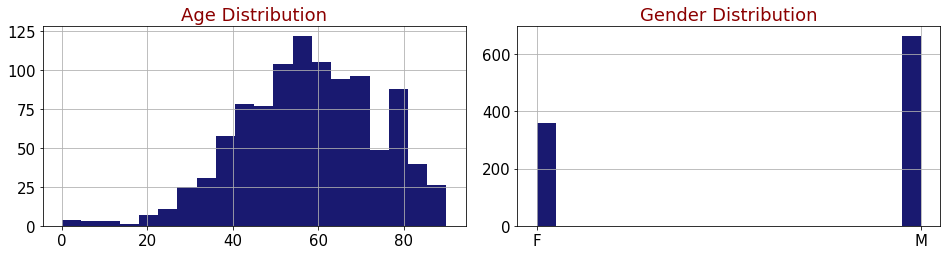

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(age_n_gender,age_n_gender.columns,6,3)

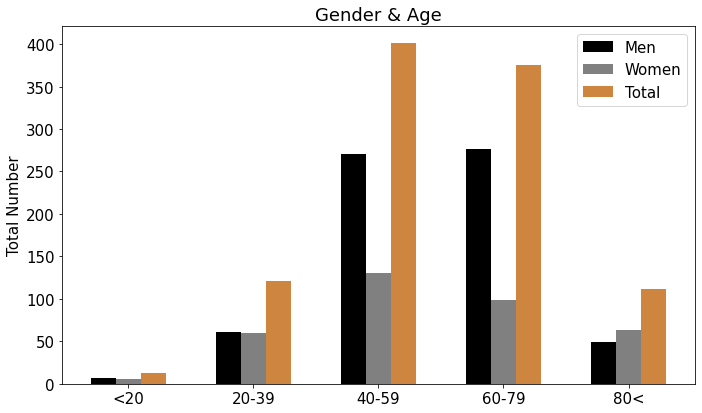

In [ ]:
labels2 = ['<20', '20-39', '40-59', '60-79', '80<']
men2 = []
women2 = []
total2 = []

men2.append(midrc_1[(midrc_1['Gender'] == 'M') & (midrc_1['Age']<20)].shape[0])
men2.append(midrc_1[(midrc_1['Gender'] == 'M') & (midrc_1['Age']>=20) & (midrc_1['Age'] < 40)].shape[0])
men2.append(midrc_1[(midrc_1['Gender'] == 'M') & (midrc_1['Age']>=40) & (midrc_1['Age'] < 60)].shape[0])
men2.append(midrc_1[(midrc_1['Gender'] == 'M') & (midrc_1['Age']>=60) & (midrc_1['Age'] < 80)].shape[0])
men2.append(midrc_1[(midrc_1['Gender'] == 'M') & (midrc_1['Age']>=80)].shape[0])

women2.append(midrc_1[(midrc_1['Gender'] == 'F') & (midrc_1['Age']<20)].shape[0])
women2.append(midrc_1[(midrc_1['Gender'] == 'F') & (midrc_1['Age']>=20) & (midrc_1['Age'] < 40)].shape[0])
women2.append(midrc_1[(midrc_1['Gender'] == 'F') & (midrc_1['Age']>=40) & (midrc_1['Age'] < 60)].shape[0])
women2.append(midrc_1[(midrc_1['Gender'] == 'F') & (midrc_1['Age']>=60) & (midrc_1['Age'] < 80)].shape[0])
women2.append(midrc_1[(midrc_1['Gender'] == 'F') & (midrc_1['Age']>=80)].shape[0])

for i in range(len(men2)):
  total2.append(men2[i]+women2[i])


x = np.arange(len(labels2))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))
bar1 = ax.bar(x - width, men2, width, label='Men', color='k')
bar2 = ax.bar(x, women2, width, label='Women', color = 'grey')
bar3 = ax.bar(x + width, total2, width, label='Total', color = 'peru')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Number')
ax.set_title('Gender & Age')
ax.set_xticks(x)
ax.set_xticklabels(labels2)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
#fig, ax = plt.subplots(1,1,figsize=(10,6), dpi= 72)

#covid_symptoms_labels = ('Mild', 'Moderate', 'Severe', 'Negative'])
#midrc_labels_mild = (midrc_labels_mild.value_counts())
#print(midrc_labels_mild)
#midrc_labels_moderate = (midrc_labels_moderate.value_counts())
#print(midrc_labels_moderate)
#midrc_symptoms_severe = (midrc_labels_severe.value_counts())
#print(midrc_symptoms_severe)
#midrc_symptoms_negative = (midrc_labels_negative.value_counts())
#print(midrc_symptoms_negative)
#
#midrc['labels'].str.contains('Moderate')
#midrc_labels_severe.value_counts()
#covid_womenSymptoms = []
#covid_menSymptoms = []
#covid_totalSymptoms = []

#for i in range(len(covid_symptoms_labels)):
#  covid_menSymptoms.append(midrc_labels_mild[(midrc_labels_mild['midrc_labels_mild']=='True') & (midrc_labels_mild[covid_symptoms_labels[i]] == True)].shape[0])
#  covid_womenSymptoms.append(midrc_1[(midrc_1['Gender']=='F') & (midrc_1[covid_symptoms_labels[i]] == True)].shape[0])
#  covid_totalSymptoms.append(covid_menSymptoms[i] + covid_womenSymptoms[i])

#Total = list(covid_symptoms_labels.value_counts())

#plt.xlabel('symptoms', fontsize = 10)
#ax.set_xticklabels(covid_symptoms_labels,fontsize=8)
#plt.ylabel('Population By Symptoms', fontsize = 10)
#plt.title("Total of Symptoms", fontsize = 10)

#plt.plot(covid_symptoms_labels, covid_womenSymptoms, marker = 'o', color='k')
#plt.plot(covid_symptoms_labels, covid_menSymptoms, marker = 'o', color = 'grey')
#plt.plot(covid_symptoms_labels, covid_totalSymptoms, marker = 'o', color = 'peru')

#plt.show()

In [ ]:
#성별, 증상 정도

In [ ]:
##나이별, 증상이 아픈정도
#성별, 증상 정도

In [ ]:
midrc_des = midrc['Description']
midrc_des

0                                   CXR
1                    XR CHEST 1 VIEW AP
2                                   CXR
3                    XR CHEST 1 VIEW AP
4                                   CXR
                     ...               
1017                           CHEST 1V
1018                                CXR
1019    XR CHEST 2 VIEWS PA AND LATERAL
1020                 XR CHEST 1 VIEW AP
1021                 XR CHEST 1 VIEW AP
Name: Description, Length: 1022, dtype: object

In [ ]:
midrc_desw = midrc_des.value_counts()
midrc_desw

XR CHEST 1 VIEW AP                 497
CXR                                436
CHEST 1V                            76
XR CHEST 2 VIEWS PA AND LATERAL     13
Name: Description, dtype: int64

### 5.3.2 Labels_분석

In [ ]:
#Labels 속 Mild
midrc_labels_mild = midrc['labels'].str.contains('Mild')
midrc_labels_mild

0        True
1        True
2       False
3       False
4        True
        ...  
1017     True
1018    False
1019    False
1020    False
1021    False
Name: labels, Length: 1022, dtype: object

In [ ]:
midrc[(midrc['Gender'] == 'F') & (midrc['labels'].str.contains('Mild'))].value_counts()

fname                                                                               StudyInstanceUID                                                  number  labels                                                       Age  Gender  Description         ImageCount  Result    Test             
SITE2-000272_10-08-2000-41527_1.000000-76740_000000.dcm.jpg                         1.2.826.0.1.3680043.10.474.2774497276904671264590064084633841527  707     Mild Atypical,Atypical Moderate,Mild Atypical                68   F       CXR                 1           DETECTED  RT-PCR               1
SITE2-000147_04-27-2008-13199_1.000000-60807_000000.dcm.jpg                         1.2.826.0.1.3680043.10.474.2460371041494091600371369457551413199  969     Mild Indeterminate,Indeterminate Moderate,Moderate Atypical  38   F       CXR                 1           DETECTED  RT-PCR               1
SITE2-000061_10-14-2007-86515_1.000000-98043_000000.dcm.jpg                         1.2.826.0.1.3680043.10.474.259

In [ ]:
midrc[(midrc['Gender'] == 'M') & (midrc['labels'].str.contains('Mild'))].value_counts()

fname                                                                                     StudyInstanceUID                                                  number  labels                                                                       Age  Gender  Description         ImageCount  Result    Test               
SITE2-000293_12-06-2002-00096_1.000000-11544_000000.dcm.jpg                               1.2.826.0.1.3680043.10.474.7394515426767300306682021933233400096  43      Negative,Mild Indeterminate,Indeterminate Moderate                           74   M       CXR                 1           DETECTED  RT-PCR                 1
419639-002863_08-04-2005-XR CHEST 1 VIEW AP-91811_1.000000-AP-89430_000000.dcm.jpg        1.2.826.0.1.3680043.10.474.419639.153821830243285728934575991811  915     Mild Indeterminate,Indeterminate Moderate,Indeterminate Moderate             68   M       XR CHEST 1 VIEW AP  1           DETECTED  Pooled NP/OP Swab      1
419639-003003_04-21-2005-XR CHEST 1 VIEW A

In [ ]:
midrc[(midrc['Gender'] == 'F') & (midrc['labels'].str.contains('Moderate'))].value_counts()

fname                                                                                     StudyInstanceUID                                                  number  labels                                                                          Age  Gender  Description         ImageCount  Result    Test             
SITE2-000279_12-11-1999-56879_1.000000-47895_000000.dcm.jpg                               1.2.826.0.1.3680043.10.474.1197925884133348754840689750342356879  351     Atypical Moderate,Indeterminate Moderate,Typical Moderate,Indeterminate Severe  55   F       CXR                 1           DETECTED  RT-PCR               1
440808-000010_02-15-2003-CHEST 1V-8.158_1.000000-AP-8.159_000000.dcm.jpg                  1.2.826.0.1.3680043.10.474.440808.158                             814     Moderate Indeterminate,Typical Moderate,Moderate Typical                        55   F       CHEST 1V            1           DETECTED  RT-PCR               1
419639-002773_07-17-2009-XR CHEST 1 VIE

In [ ]:
midrc[(midrc['Gender'] == 'M') & (midrc['labels'].str.contains('Moderate'))].value_counts()

fname                                                                                     StudyInstanceUID                                                  number  labels                                                            Age  Gender  Description         ImageCount  Result    Test               
SITE2-000297_02-28-2009-71173_2.000000-60728_000000.dcm.jpg                               1.2.826.0.1.3680043.10.474.2678517781106521762581033497526871173  18      Moderate Typical,Severe Typical,Indeterminate Severe              59   M       CXR                 3           DETECTED  RT-PCR                 1
419639-002844_01-03-2009-XR CHEST 1 VIEW AP-31673_1.000000-AP-22152_000000.dcm.jpg        1.2.826.0.1.3680043.10.474.419639.263004166558905874285143231673  664     Negative,Mild Indeterminate,Indeterminate Moderate                63   M       XR CHEST 1 VIEW AP  1           DETECTED  Pooled NP/OP Swab      1
419639-002863_08-04-2005-XR CHEST 1 VIEW AP-91811_1.000000-AP-89430_000000.

In [ ]:
midrc[(midrc['Gender'] == 'F') & (midrc['labels'].str.contains('Severe'))].value_counts()

fname                                                                               StudyInstanceUID                                                  number  labels                                                       Age  Gender  Description         ImageCount  Result    Test               
SITE2-000291_02-23-2005-42841_1.000000-99505_000000.dcm.jpg                         1.2.826.0.1.3680043.10.474.2633413795775145859509502426393742841  693     Negative,Severe Typical,Typical Severe                       66   F       CXR                 1           DETECTED  RT-PCR                 1
SITE2-000042_02-09-2008-35509_1.000000-89824_000000.dcm.jpg                         1.2.826.0.1.3680043.10.474.1955291947421875445552312450058935509  848     Mild Atypical,Atypical Moderate,Severe Atypical              40   F       CXR                 2           DETECTED  RT-PCR                 1
440808-000010_02-17-2003-CHEST 1V-8.184_3.000000-AP-8.185_000000.dcm.jpg            1.2.826.0.1.3680043.10.4

In [ ]:
#Labels 속 Moderate
midrc_labels_moderate = midrc['labels'].str.contains('Moderate')
midrc_labels_moderate

0       False
1        True
2        True
3        True
4        True
        ...  
1017     True
1018     True
1019    False
1020     True
1021     True
Name: labels, Length: 1022, dtype: object

In [ ]:
midrc[(midrc['Gender'] == 'M') & (midrc['labels'].str.contains('Severe'))].value_counts()

fname                                                                                     StudyInstanceUID                                                  number  labels                                                                    Age  Gender  Description         ImageCount  Result    Test               
SITE2-000297_02-28-2009-71173_2.000000-60728_000000.dcm.jpg                               1.2.826.0.1.3680043.10.474.2678517781106521762581033497526871173  18      Moderate Typical,Severe Typical,Indeterminate Severe                      59   M       CXR                 3           DETECTED  RT-PCR                 1
419639-002649_06-13-2003-XR CHEST 1 VIEW AP-34990_2.000000-AP-87108_000000.dcm.jpg        1.2.826.0.1.3680043.10.474.419639.126047955310816597496717434990  802     Severe Indeterminate,Severe Indeterminate,Severe Atypical                 47   M       XR CHEST 1 VIEW AP  1           DETECTED  Pooled NP/OP Swab      1
419639-002798_12-19-2008-XR CHEST 1 VIEW AP-17571_1

In [ ]:
midrc[(midrc['Gender'] == 'F') & (midrc['labels'].str.contains('Negative'))].value_counts()

fname                                                                                     StudyInstanceUID                                                  number  labels                                                   Age  Gender  Description         ImageCount  Result    Test             
SITE2-000291_02-23-2005-42841_1.000000-99505_000000.dcm.jpg                               1.2.826.0.1.3680043.10.474.2633413795775145859509502426393742841  693     Negative,Severe Typical,Typical Severe                   66   F       CXR                 1           DETECTED  RT-PCR               1
419639-003338_12-27-2001-XR CHEST 1 VIEW AP-57135_1.000000-CHEST AP-90547_000000.dcm.jpg  1.2.826.0.1.3680043.10.474.419639.233536046850049734634813157135  482     Negative,Negative,Negative                               49   F       XR CHEST 1 VIEW AP  1           DETECTED  Pooled NP/OP Swab    1
SITE2-000012_05-15-2000-09172_1.000000-06304_000000.dcm.jpg                               1.2.826.0.1.368004

In [ ]:
midrc[(midrc['Gender'] == 'M') & (midrc['labels'].str.contains('Negative'))].value_counts()

fname                                                                                            StudyInstanceUID                                                  number  labels                                                               Age  Gender  Description                      ImageCount  Result    Test               
SITE2-000293_12-07-2002-40361_1.000000-73163_000000.dcm.jpg                                      1.2.826.0.1.3680043.10.474.3372892677898061943005363909788340361  930     Negative,Indeterminate Severe,Severe Typical,Indeterminate Moderate  74   M       CXR                              1           DETECTED  RT-PCR                 1
419639-002825_09-20-2005-XR CHEST 1 VIEW AP-85192_1.000000-AP-16271_000000.dcm.jpg               1.2.826.0.1.3680043.10.474.419639.115937607526635017650654585192  25      Negative,Negative,Negative                                           40   M       XR CHEST 1 VIEW AP               1           DETECTED  Pooled NP/OP Swab      1
419639

In [ ]:
midrc_labels_moderate.value_counts()

True     519
False    492
Name: labels, dtype: int64

In [ ]:
#Labels 속 Severe
midrc_labels_severe = midrc['labels'].str.contains('Severe')
#midrc_labels_severe

In [ ]:
midrc_labels_negative = midrc['labels'].str.contains('Negative')
midrc_labels_negative

0       False
1        True
2       False
3       False
4       False
        ...  
1017    False
1018    False
1019     True
1020    False
1021    False
Name: labels, Length: 1022, dtype: object

In [ ]:
midrc_labels_negative.value_counts()

False    601
True     410
Name: labels, dtype: int64

#운동 처방 데이터
* 6. (통합)_KS_NFA_FTNESS_MESURE_MVM_PRSCRPTN_INFO_202008.csv
* 7. (통합)_KS_NFA_FTNESS_MESURE_STTUS_202101.csv
* 8. (통합)_KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_202101.csv
* 9. KS_MRFN_TY_ACCTO_WALK_ANALS_INFO_202110.csv

In [ ]:
import os
os.chdir('/content/drive/MyDrive/General Data Language/data/001. 제출자료/국민체육진흥공단')

## ITEM

In [ ]:
#(통합)_KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_202101
#ITEM
ITEM = pd.read_csv('(통합)_KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_202101.csv')
ITEM

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,ITEM_F001,ITEM_F002,ITEM_F003,ITEM_F004,ITEM_F005,ITEM_F006,ITEM_F007,ITEM_F008,ITEM_F009,ITEM_F010,ITEM_F011,ITEM_F012,ITEM_F013,ITEM_F014,ITEM_F015,ITEM_F016,ITEM_F017,ITEM_F018,ITEM_F019,ITEM_F020,ITEM_F021,ITEM_F022,ITEM_F023,ITEM_F024,ITEM_F025,ITEM_F026,ITEM_F027,ITEM_F028,ITEM_F029,ITEM_F030,ITEM_F031,ITEM_F032,ITEM_F033,ITEM_F034,ITEM_F035,ITEM_F036,ITEM_F037,ITEM_F038,ITEM_F039,ITEM_F040,ITEM_F041
0,1,KSPO아산,성인,일반,63.0,관리자,참가증,20210106,M,164.6,74.4,30.8,87.0,92.0,151.0,34.5,29.0,NaN,NaN,NaN,16.5,NaN,NaN,NaN,NaN,NaN,27.5,22.0,NaN,NaN,160.0,NaN,NaN,NaN,NaN,NaN,46.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,35.7,NaN,NaN,0.475,NaN
1,1,남구(울산),성인,일반,35.0,관리자,참가증,20210106,M,167.6,72.8,27.4,92.9,97.0,146.0,51.0,35.9,NaN,NaN,NaN,-1.2,NaN,NaN,NaN,NaN,NaN,25.9,37.0,NaN,NaN,156.0,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,42.3,NaN,NaN,0.349,NaN
2,1,KSPO광주,성인,일반,63.0,관리자,3등급,20210106,M,165.5,68.3,23.4,82.7,92.0,157.0,39.3,31.8,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,24.9,29.0,NaN,NaN,146.0,NaN,NaN,NaN,NaN,NaN,57.5,NaN,NaN,70.0,106.0,136.0,165.0,34.0,NaN,NaN,NaN,NaN,0.366,NaN
3,1,KSPO아산,성인,일반,57.0,관리자,2등급,20210106,F,160.4,62.4,32.7,74.0,69.0,123.0,24.9,28.9,NaN,NaN,NaN,19.5,NaN,NaN,NaN,NaN,NaN,24.3,15.0,NaN,NaN,148.0,NaN,NaN,NaN,NaN,NaN,46.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,33.4,NaN,NaN,0.436,NaN
4,1,남구(울산),성인,일반,26.0,관리자,3등급,20210106,M,181.1,84.4,18.0,94.4,65.0,142.0,54.1,52.0,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,25.7,45.0,NaN,NaN,206.0,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0,42.7,NaN,NaN,0.359,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118828,6,익산,성인,출장,19.0,관리자,3등급,20211008,M,171.5,75.7,23.9,NaN,63.0,121.0,36.2,48.3,NaN,NaN,NaN,17.6,NaN,NaN,NaN,NaN,NaN,25.7,43.0,56.0,9.90,227.0,NaN,NaN,NaN,NaN,NaN,63.8,NaN,45.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118829,3,익산,성인,출장,19.0,관리자,2등급,20211008,F,161.8,64.6,30.0,NaN,61.0,106.0,27.7,34.1,NaN,NaN,NaN,23.2,NaN,NaN,NaN,NaN,NaN,24.7,35.0,31.0,12.28,172.0,NaN,NaN,NaN,NaN,NaN,52.8,NaN,35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118830,1,구미,성인,일반,27.0,관리자,2등급,20211001,M,174.4,61.6,15.5,NaN,65.0,122.0,31.3,41.9,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,20.3,52.0,NaN,NaN,212.0,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,48.9,NaN,NaN,0.332,NaN
118831,1,충주,청소년,출장,14.0,관리자,2등급,20211001,M,173.5,74.4,26.9,NaN,67.0,137.0,43.0,50.3,NaN,52.0,NaN,7.7,18.78,NaN,51.47,5.0,51.7,24.7,NaN,63.0,NaN,200.0,NaN,NaN,NaN,NaN,NaN,67.6,NaN,-32.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ITEM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118833 entries, 0 to 118832
Data columns (total 50 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   TEST_CNT   118833 non-null  int64  
 1   CENTER_NM  118833 non-null  object 
 2   AGE_GBN    118833 non-null  object 
 3   TEST_GBN   118833 non-null  object 
 4   TEST_AGE   118832 non-null  float64
 5   INPUT_GBN  107286 non-null  object 
 6   CERT_GBN   118831 non-null  object 
 7   TEST_YMD   118833 non-null  int64  
 8   TEST_SEX   118832 non-null  object 
 9   ITEM_F001  118799 non-null  float64
 10  ITEM_F002  118803 non-null  float64
 11  ITEM_F003  111447 non-null  float64
 12  ITEM_F004  67579 non-null   float64
 13  ITEM_F005  118788 non-null  float64
 14  ITEM_F006  118786 non-null  float64
 15  ITEM_F007  118078 non-null  float64
 16  ITEM_F008  118142 non-null  float64
 17  ITEM_F009  27019 non-null   float64
 18  ITEM_F010  27858 non-null   float64
 19  ITEM_F011  0 non-null  

In [ ]:
ITEM.describe()

,TEST_CNT,TEST_AGE,TEST_YMD,ITEM_F001,ITEM_F002,ITEM_F003,ITEM_F004,ITEM_F005,ITEM_F006,ITEM_F007,ITEM_F008,ITEM_F009,ITEM_F010,ITEM_F011,ITEM_F012,ITEM_F013,ITEM_F014,ITEM_F015,ITEM_F016,ITEM_F017,ITEM_F018,ITEM_F019,ITEM_F020,ITEM_F021,ITEM_F022,ITEM_F023,ITEM_F024,ITEM_F025,ITEM_F026,ITEM_F027,ITEM_F028,ITEM_F029,ITEM_F030,ITEM_F031,ITEM_F032,ITEM_F033,ITEM_F034,ITEM_F035,ITEM_F036,ITEM_F037,ITEM_F038,ITEM_F039,ITEM_F040,ITEM_F041
count,118833.000000,118832.000000,1.188330e+05,118799.000000,118803.000000,111447.000000,67579.000000,118788.000000,118786.000000,118078.000000,118142.000000,27019.000000,27858.000000,0.0,118083.000000,45186.000000,39141.000000,45355.000000,45347.000000,45353.000000,118828.000000,53588.000000,29143.000000,2971.000000,86118.000000,7911.000000,144.000000,7739.000000,7849.000000,7823.000000,118279.000000,0.0,25591.000000,8587.000000,8560.000000,8547.000000,3233.000000,8541.000000,62131.000000,62130.000000,4.000000,4.000000,48965.000000,6055.000000
mean,1.709559,27.029007,2.021062e+07,166.851517,66.324882,25.846675,80.608525,75.915092,125.929551,32.189999,34.386590,33.611592,39.642042,NaN,11.152675,21.764475,0.622404,133.533014,10.432531,125.935831,23.755757,36.836691,36.507450,11.079933,179.859062,20.995955,586.786111,107.347332,6.000191,25.224149,52.806115,NaN,5.848244,92.894142,118.831192,138.097695,146.169502,41.313137,121.147543,40.794677,26.125000,25.950000,0.370280,0.614089
std,1.695214,17.596543,2.393843e+02,9.549721,14.852459,16.951019,11.382332,28.997320,38.778370,10.919065,11.757639,22.345995,13.592779,NaN,10.799479,87.256472,5.684084,5904.461808,6.790763,5870.548707,29.909861,14.849134,20.646187,2.798590,47.232175,6.390929,118.518694,22.788742,1.935038,7.968812,15.140972,NaN,97.181816,24.265149,16.625308,17.773602,51.307276,6.660721,25.027403,19.433467,30.176522,29.971598,0.695651,3.967948
min,1.000000,11.000000,2.021010e+07,51.900000,10.000000,0.000000,30.100000,0.000000,-84.000000,0.000000,0.000000,-5.000000,0.000000,NaN,-81.000000,-14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-9181.800000,0.000000,0.000000,0.000000,0.000000,-17.100000,0.000000,-2347.200000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,2.021042e+07,160.100000,55.600000,19.200000,72.900000,69.000000,117.000000,23.500000,25.200000,18.000000,30.000000,NaN,5.300000,18.900000,0.433000,46.165500,7.000000,46.628000,20.800000,27.000000,20.000000,10.230000,150.000000,17.000000,540.000000,97.000000,4.980000,20.860000,43.600000,NaN,-34.400000,79.000000,108.000000,127.000000,146.000000,36.400000,104.000000,36.700000,0.000000,0.000000,0.321000,0.438500
50%,1.000000,19.000000,2.021060e+07,167.600000,65.200000,25.600000,80.000000,76.000000,124.000000,31.500000,33.700000,29.000000,41.000000,NaN,12.000000,20.790000,0.502000,51.065000,9.000000,51.526000,23.300000,39.000000,32.000000,10.960000,181.000000,21.000000,605.500000,110.000000,5.600000,23.600000,52.300000,NaN,36.100000,89.000000,119.000000,138.000000,161.000000,41.500000,120.000000,40.900000,25.650000,25.550000,0.355000,0.510000
75%,2.000000,32.000000,2.021082e+07,174.000000,75.600000,32.100000,88.000000,82.000000,134.000000,40.400000,43.000000,44.000000,50.000000,NaN,17.900000,23.130000,0.569000,57.230500,13.000000,57.674000,26.000000,48.000000,50.000000,12.005000,212.000000,25.000000,662.250000,121.000000,6.439000,27.245000,61.500000,NaN,41.500000,98.000000,129.000000,150.000000,173.000000,46.400000,138.000000,45.700000,51.775000,51.500000,0.393000,0.567000
max,49.000000,101.000000,2.021103e+07,202.500000,174.400000,3637.000000,173.500000,7275.000000,11612.000000,441.100000,929.400000,209.000000,401.000000,NaN,1706.000000,18391.000000,535.000000,573924.000000,758.000000,573924.736000,10000.000000,90.000000,154.000000,54.500000,6193.000000,46.000000,765.000000,190.000000,42.720000,150.000000,2109.100000,NaN,66.900000,758.000000,195.000000,200.000000,221.000000,83.9

In [ ]:
ITEM.corr()

,TEST_CNT,TEST_AGE,TEST_YMD,ITEM_F001,ITEM_F002,ITEM_F003,ITEM_F004,ITEM_F005,ITEM_F006,ITEM_F007,ITEM_F008,ITEM_F009,ITEM_F010,ITEM_F011,ITEM_F012,ITEM_F013,ITEM_F014,ITEM_F015,ITEM_F016,ITEM_F017,ITEM_F018,ITEM_F019,ITEM_F020,ITEM_F021,ITEM_F022,ITEM_F023,ITEM_F024,ITEM_F025,ITEM_F026,ITEM_F027,ITEM_F028,ITEM_F029,ITEM_F030,ITEM_F031,ITEM_F032,ITEM_F033,ITEM_F034,ITEM_F035,ITEM_F036,ITEM_F037,ITEM_F038,ITEM_F039,ITEM_F040,ITEM_F041
TEST_CNT,1.000000,0.114623,0.066556,0.047550,0.050924,-0.008980,0.038584,-0.006565,0.012298,0.093161,0.090270,0.089235,0.136272,NaN,0.071278,-0.007347,0.002668,-0.000748,-0.028356,-0.000986,0.003778,0.136731,0.045365,-0.070457,0.098112,0.124153,0.147980,0.100937,-0.021865,-0.025122,0.064950,NaN,-0.022781,-0.056092,-0.030220,-0.009970,0.003493,-0.004662,-0.077009,0.007101,0.292834,0.296357,-0.014240,-0.003693
TEST_AGE,0.114623,1.000000,0.020198,-0.119618,0.050226,0.075737,0.269742,0.037209,0.130808,0.033720,0.015116,0.144427,0.176618,NaN,0.006341,-0.007871,0.006917,-0.009831,-0.037680,-0.009844,0.084587,-0.476250,0.016228,0.259246,-0.016365,-0.330537,-0.541447,-0.339995,0.412649,0.460645,-0.036354,NaN,0.064277,-0.325522,-0.283316,-0.114814,0.173074,-0.579366,-0.349025,-0.130147,0.243152,0.246473,0.032691,0.004443
TEST_YMD,0.066556,0.020198,1.000000,0.030282,0.015767,-0.004246,0.005810,-0.012660,-0.017622,0.027334,0.029596,0.019140,0.031969,NaN,0.004169,-0.004379,-0.011783,-0.006265,-0.045166,-0.006139,-0.004102,-0.013830,-0.053409,-0.070320,0.034432,-0.190758,-0.150167,-0.063273,0.171836,0.173696,0.018104,NaN,-0.303220,-0.084859,-0.038434,0.010293,0.038034,-0.042688,-0.083570,-0.010881,-0.160314,-0.163505,-0.000814,-0.016272
ITEM_F001,0.047550,-0.119618,0.030282,1.000000,0.657093,-0.232981,0.375573,0.047808,0.068527,0.726558,0.716190,0.235163,0.389801,NaN,-0.087755,-0.004683,0.013690,-0.004824,-0.040582,-0.005560,0.183539,0.471992,0.198371,-0.242446,0.548848,0.215000,0.331775,0.196612,-0.271803,-0.274724,0.367890,NaN,-0.005729,0.005291,-0.068885,-0.126012,0.067796,0.446820,-0.110605,0.142989,-1.000000,-1.000000,-0.034058,-0.008169
ITEM_F002,0.050924,0.050226,0.015767,0.657093,1.000000,0.104917,0.825135,0.081669,0.115843,0.625486,0.613760,0.007821,0.070212,NaN,-0.089254,-0.000902,-0.000335,0.000232,-0.025930,0.000043,0.474418,0.225719,-0.081255,-0.085617,0.285631,0.061601,-0.004042,0.062426,-0.099130,-0.107243,0.003377,NaN,-0.012067,-0.086283,-0.038947,-0.007411,0.097270,-0.062770,-0.089840,-0.018954,1.000000,1.000000,-0.018580,0.000513
ITEM_F003,-0.008980,0.075737,-0.004246,-0.232981,0.104917,1.000000,0.391903,0.015170,0.006957,-0.222690,-0.217779,-0.167240,-0.232865,NaN,-0.001330,0.006009,-0.007195,0.004187,0.042652,0.004766,0.031374,-0.515453,-0.271232,0.313816,-0.338794,-0.282784,-0.443624,-0.198770,0.221059,0.220117,-0.320083,NaN,-0.016483,0.041642,0.211626,0.311203,0.117188,-0.685201,0.198555,-0.217651,0.981060,0.981810,0.030911,-0.004054
ITEM_F004,0.038584,0.269742,0.005810,0.375573,0.825135,0.391903,1.000000,0.103666,0.243855,0.401473,0.381693,-0.170429,-0.071726,NaN,-0.148458,0.023973,-0.015606,0.000155,-0.023000,-0.000018,0.360518,-0.045392,-0.229603,0.103516,0.108395,-0.121447,-0.326265,-0.098559,0.030463,0.024266,-0.133081,NaN,-0.038353,0.017199,0.026443,0.024390,0.141742,-0.277557,0.006353,-0.086335,-1.000000,-1.000000,-0.002358,0.012118
ITEM_F005,-0.006565,0.037209,-0.012660,0.047808,0.081669,0.015170,0.103666,1.000000,0.077512,0.064895,0.062233,-0.010411,-0.010365,NaN,0.002917,0.002099,-0.003115,0.001068,-0.009273,0.000808,0.003342,0.001346,-0.002459,0.085007,0.020082,0.157917,0.025022,0.099197,-0.135143,-0.167009,0.011927,NaN,0.003473,0.073521,0.099034,0.071473,0.149529,-0.101687,0.009421,-0.043422,NaN,NaN,-0.011747,0.013589
ITEM_F006,0.012298,0.130808,-0.017622,0.068527,0.115843,0.006957,0.243855,0.077512,1.000000,0.099092,0.095536,-0.023594,0.022481,NaN,-0.001762,0.002077,0.000137,-0.000985,-0.015896,-0.001099,0.006093,0.038104,0.016370,0.047279,0.126500,0.096272,-0.109692,0.061263

In [ ]:
ITEM_1 = pd.DataFrame(ITEM, columns=['TEST_CNT',	'CENTER_NM',	'AGE_GBN',
                                     'TEST_GBN',	'TEST_AGE',	'TEST_SEX', 'INPUT_GBN',	'CERT_GBN'	])
ITEM_1

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,TEST_SEX,INPUT_GBN,CERT_GBN
0,1,KSPO아산,성인,일반,63.0,M,관리자,참가증
1,1,남구(울산),성인,일반,35.0,M,관리자,참가증
2,1,KSPO광주,성인,일반,63.0,M,관리자,3등급
3,1,KSPO아산,성인,일반,57.0,F,관리자,2등급
4,1,남구(울산),성인,일반,26.0,M,관리자,3등급
...,...,...,...,...,...,...,...,...
118828,6,익산,성인,출장,19.0,M,관리자,3등급
118829,3,익산,성인,출장,19.0,F,관리자,2등급
118830,1,구미,성인,일반,27.0,M,관리자,2등급
118831,1,충주,청소년,출장,14.0,M,관리자,2등급


In [ ]:
# 성별로 나이별로 측정을 받는 사람은 얼마나 되는 지 (여자)
Participant_f_by_area = ITEM_1[(ITEM_1['TEST_SEX'] == 'F')].groupby('CENTER_NM').size()
Participant_f_by_area

CENTER_NM
KSPO(버스)         2
KSPO광주         486
KSPO광주(출장)     295
KSPO대구         512
KSPO대구(출장A)    236
              ... 
충주             160
태백             218
포천             279
포항             312
화성             328
Length: 81, dtype: int64

In [ ]:
# 성별로 나이별로 측정을 받는 사람은 얼마나 되는 지 (남자)
Participant_m_by_area = ITEM_1[(ITEM_1['TEST_SEX'] == 'M')].groupby('CENTER_NM').size()
Participant_m_by_area

CENTER_NM
KSPO(버스)          9
KSPO광주          772
KSPO광주(출장)      885
KSPO대구         1360
KSPO대구(출장A)     296
               ... 
충주              871
태백              240
포천              486
포항             1317
화성              359
Length: 81, dtype: int64

## MVM

In [ ]:
#(통합)_KS_NFA_FTNESS_MESURE_MVM_PRSCRPTN_INFO_202008
#MVM
MVM = pd.read_csv('(통합)_KS_NFA_FTNESS_MESURE_MVM_PRSCRPTN_INFO_202008.csv')
MVM

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,PRES_NOTE,TEST_SEX
0,1,삼척,성인,출장,46,관리자,참가증,20200820,"준비운동:전신 루틴 스트레칭,유산소 운동 전 동적 루틴 스트레칭 / 본운동:윗몸 말...",M
1,1,삼척,성인,출장,53,관리자,참가증,20200820,"준비운동:유산소 운동 전 동적 루틴 스트레칭 / 본운동:걷기,실내 자전거타기,트레드...",M
2,1,삼척,성인,출장,38,관리자,2등급,20200820,"준비운동:전신 루틴 스트레칭,유산소 운동 전 동적 루틴 스트레칭 / 본운동:윗몸 말...",M
3,1,삼척,성인,출장,45,관리자,참가증,20200820,"준비운동:하지 루틴 스트레칭2,상지 루틴 스트레칭 / 본운동:스텝퍼 옆으로 뛰어넘기...",M
4,1,삼척,성인,출장,24,관리자,참가증,20200820,"준비운동:전신 루틴 스트레칭,유산소 운동 전 동적 루틴 스트레칭 / 본운동:윗몸 말...",M
...,...,...,...,...,...,...,...,...,...,...
113267,3,KSPO대구,성인,일반,29,NaN,3등급,20210916,"준비운동:요가 및 필라테스 루틴프로그램,정적 스트레칭 루틴프로그램,전신 루틴 스...",M
113268,1,서대문,성인,일반,22,NaN,참가증,20210916,"준비운동:엉덩이 스트레칭,엉덩이 스트레칭2 / 본운동:앉아서 다리 밀기,앉아서 다리...",F
113269,1,연제,성인,일반,28,NaN,2등급,20210916,"준비운동:트레드밀에서 걷기,계단 뛰어 오르기 / 본운동:엎드려서 다리 차올리기,의자...",M
113270,8,KSPO송파,성인,일반,63,NaN,참가증,20210916,"준비운동:자가근막이완술 루틴 스트레칭 / 본운동:넙다리 뒤쪽 스트레칭,넙다리 앞쪽 ...",F


In [ ]:
MVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113272 entries, 0 to 113271
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   TEST_CNT   113272 non-null  int64 
 1   CENTER_NM  113272 non-null  object
 2   AGE_GBN    113272 non-null  object
 3   TEST_GBN   113272 non-null  object
 4   TEST_AGE   113272 non-null  int64 
 5   INPUT_GBN  100268 non-null  object
 6   CERT_GBN   113270 non-null  object
 7   TEST_YMD   113272 non-null  int64 
 8   PRES_NOTE  113272 non-null  object
 9   TEST_SEX   113272 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.6+ MB


In [ ]:
MVM.describe()

,TEST_CNT,TEST_AGE,TEST_YMD
count,113272.000000,113272.000000,1.132720e+05
mean,1.690488,28.495127,2.020753e+07
std,1.658825,17.647093,4.454343e+03
min,1.000000,11.000000,2.020080e+07
25%,1.000000,17.000000,2.020111e+07
50%,1.000000,20.000000,2.021041e+07
75%,2.000000,35.000000,2.021061e+07
max,49.000000,101.000000,2.021093e+07


In [ ]:
MVM.corr()

,TEST_CNT,TEST_AGE,TEST_YMD
TEST_CNT,1.000000,0.101699,0.043334
TEST_AGE,0.101699,1.000000,0.028030
TEST_YMD,0.043334,0.028030,1.000000


In [ ]:
# CERT_GBN 별로 지역 비율은 얼마나 되는 지(분석)
Participant_bgn_by_age = ITEM_1[(ITEM_1['TEST_SEX'] == 'F')].groupby('TEST_AGE').size()
Participant_bgn_by_age

TEST_AGE
11.0     1786
12.0     1483
13.0     2975
14.0     2466
15.0     2715
         ... 
91.0        8
93.0        1
96.0        3
98.0        1
101.0       1
Length: 85, dtype: int64

In [ ]:
Participant_m_by_age = ITEM_1[(ITEM_1['TEST_SEX'] == 'M')].groupby('TEST_AGE').size()
Participant_m_by_age

TEST_AGE
11.0    1969
12.0    1999
13.0    4036
14.0    3603
15.0    3883
        ... 
90.0       1
91.0       2
92.0       3
93.0       3
94.0       2
Length: 84, dtype: int64

In [ ]:
Participant_f_by_age = ITEM_1[(ITEM_1['TEST_SEX'] == 'F')].groupby('TEST_AGE').size()
Participant_f_by_age

TEST_AGE
11.0     1786
12.0     1483
13.0     2975
14.0     2466
15.0     2715
         ... 
91.0        8
93.0        1
96.0        3
98.0        1
101.0       1
Length: 85, dtype: int64

In [ ]:
Participant_bgn_by_sex_m = ITEM_1[(ITEM_1['TEST_SEX'] == 'M')].groupby('CERT_GBN').size()
Participant_bgn_by_sex_m

CERT_GBN
1등급     4099
2등급    10389
3등급    14926
금상         1
동상         4
은상         1
참가상       13
참가증    44701
dtype: int64

In [ ]:
Participant_bgn_by_sex_f = ITEM_1[(ITEM_1['TEST_SEX'] == 'F')].groupby('CERT_GBN').size()
Participant_bgn_by_sex_f

CERT_GBN
1등급     2994
2등급     6064
3등급     8526
금상         3
은상         1
참가상        5
참가증    27103
dtype: int64

## STTUS

In [ ]:
#(통합)_KS_NFA_FTNESS_MESURE_STTUS_202101
#STTUS
STTUS = pd.read_csv('(통합)_KS_NFA_FTNESS_MESURE_STTUS_202101.csv')
STTUS

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX
0,1,남구(울산),성인,일반,25.0,관리자,참가증,20210106,M
1,1,남구(울산),성인,일반,25.0,관리자,참가증,20210106,M
2,2,남구(울산),성인,일반,27.0,관리자,3등급,20210106,M
3,1,KSPO아산,성인,일반,57.0,관리자,3등급,20210106,F
4,1,계룡,성인,일반,48.0,관리자,참가증,20210106,F
...,...,...,...,...,...,...,...,...,...
115493,1,KSPO대구,성인,일반,20.0,NaN,3등급,20211022,M
115494,2,KSPO송파,성인,일반,26.0,NaN,참가증,20211022,F
115495,3,강북,성인,일반,41.0,NaN,2등급,20211015,F
115496,2,강북,성인,일반,47.0,NaN,3등급,20211015,M


In [ ]:
STTUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115498 entries, 0 to 115497
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   TEST_CNT   115498 non-null  int64  
 1   CENTER_NM  115498 non-null  object 
 2   AGE_GBN    115498 non-null  object 
 3   TEST_GBN   115498 non-null  object 
 4   TEST_AGE   115497 non-null  float64
 5   INPUT_GBN  104470 non-null  object 
 6   CERT_GBN   115496 non-null  object 
 7   TEST_YMD   115498 non-null  int64  
 8   TEST_SEX   115497 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.9+ MB


In [ ]:
STTUS.describe()

,TEST_CNT,TEST_AGE,TEST_YMD
count,115498.000000,115497.000000,1.154980e+05
mean,1.703172,26.554785,2.021064e+07
std,1.692933,17.229867,2.323803e+02
min,1.000000,11.000000,2.021010e+07
25%,1.000000,16.000000,2.021042e+07
50%,1.000000,19.000000,2.021060e+07
75%,2.000000,31.000000,2.021082e+07
max,49.000000,101.000000,2.021103e+07


In [ ]:
STTUS.corr()

,TEST_CNT,TEST_AGE,TEST_YMD
TEST_CNT,1.000000,0.116017,0.077434
TEST_AGE,0.116017,1.000000,0.071893
TEST_YMD,0.077434,0.071893,1.000000


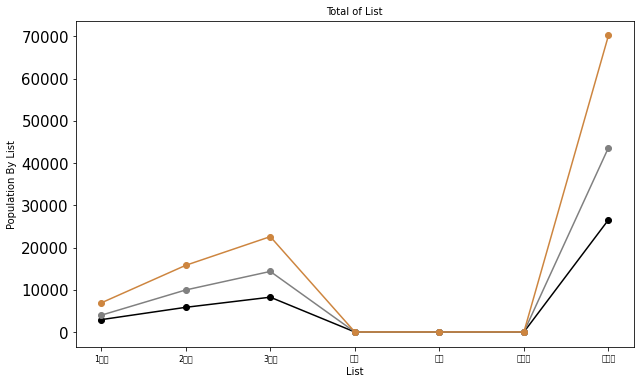

In [ ]:
# 나이별로 CERT_GBN 받는 비율이 얼마나 되는 지(분석 예정)
fig, ax = plt.subplots(1,1,figsize=(10,6), dpi= 72)

STTUS_list = list(['1등급', '2등급', '3등급', '금상', '은상', '참가상', '참가증'])

womencnt = []
mencnt = []
totalcnt = []

for i in range(len(STTUS_list)):
  womencnt.append(STTUS[(STTUS['TEST_SEX']=='F') & (STTUS['CERT_GBN'] == STTUS_list[i])].shape[0])
  mencnt.append(STTUS[(STTUS['TEST_SEX']=='M') & (STTUS['CERT_GBN'] == STTUS_list[i])].shape[0])
  totalcnt.append(mencnt[i] + womencnt[i])

Total = list(STTUS.value_counts())

plt.xlabel('List', fontsize = 10)
ax.set_xticklabels(STTUS_list,fontsize=8)
plt.ylabel('Population By List', fontsize = 10)
plt.title("Total of List", fontsize = 10)

plt.plot(STTUS_list, womencnt, marker = 'o', color='k')
plt.plot(STTUS_list, mencnt, marker = 'o', color = 'grey')
plt.plot(STTUS_list, totalcnt, marker = 'o', color = 'peru')

plt.show()# 성별로 CERT_GBN 받는 비율이 얼마나 되는 지(분석 예정)

In [ ]:
#등급     2994
#2등급     6064
#3등급     8526
#금상         3
#은상         1
#참가상        5
#참가증    27103

##WALK

In [ ]:
WALK=pd.read_csv("KS_MRFN_TY_ACCTO_WALK_ANALS_INFO_202110.csv")

In [ ]:
WALK

,MESURE_AGRDE_FLAG_NM,SEXDSTN_FLAG_CD,WEEK_ODR,DALY_ODR,MESURE_NMPR_CO,AVRG_PACE_CO
0,10대,F,WK_01,1,67,4824
1,10대,F,WK_01,2,71,4923
2,10대,F,WK_01,3,68,4396
3,10대,F,WK_01,4,71,4095
4,10대,F,WK_01,5,69,5944
...,...,...,...,...,...,...
387,70대 이상,M,WK_04,3,477,11897
388,70대 이상,M,WK_04,4,475,11263
389,70대 이상,M,WK_04,5,439,12469
390,70대 이상,M,WK_04,6,436,12259


In [ ]:
WALK.describe()

,DALY_ODR,MESURE_NMPR_CO,AVRG_PACE_CO
count,392.000000,392.000000,392.000000
mean,4.000000,2113.818878,9599.290816
std,2.002556,1913.551032,2646.708354
min,1.000000,30.000000,3198.000000
25%,2.000000,547.000000,8128.250000
50%,4.000000,1349.500000,9308.500000
75%,6.000000,3471.750000,11766.000000
max,7.000000,6189.000000,15109.000000


In [ ]:
WALK.corr()

,DALY_ODR,MESURE_NMPR_CO,AVRG_PACE_CO
DALY_ODR,1.000000,-0.039645,-0.034983
MESURE_NMPR_CO,-0.039645,1.000000,0.542576
AVRG_PACE_CO,-0.034983,0.542576,1.000000


In [ ]:
Walking_m_by_age = WALK[(WALK['SEXDSTN_FLAG_CD'] == 'M')].groupby('MESURE_AGRDE_FLAG_NM').size()
Walking_m_by_age

MESURE_AGRDE_FLAG_NM
10대       28
20대       28
30대       28
40대       28
50대       28
60대       28
70대 이상    28
dtype: int64

In [ ]:
Walking_m = WALK[WALK['SEXDSTN_FLAG_CD'] == 'M']
Walking_f = WALK[WALK['SEXDSTN_FLAG_CD'] == 'F']

In [ ]:
Walking_f_by_age = WALK[(WALK['SEXDSTN_FLAG_CD'] == 'F')].groupby('MESURE_AGRDE_FLAG_NM').size()
Walking_f_by_age

MESURE_AGRDE_FLAG_NM
10대       28
20대       28
30대       28
40대       28
50대       28
60대       28
70대 이상    28
dtype: int64

In [ ]:
Walking_m_pace = WALK[(WALK['SEXDSTN_FLAG_CD'] == 'M')].groupby('SEXDSTN_FLAG_CD').size()
Walking_m_pace

AVRG_PACE_CO
5603     1
6378     1
6405     1
6902     1
7008     1
        ..
14861    1
14893    1
14950    1
15093    1
15109    2
Length: 190, dtype: int64

In [ ]:
Walking_f_pace = WALK[(WALK['SEXDSTN_FLAG_CD'] == 'F')].groupby('AVRG_PACE_CO').size()
Walking_f_pace

AVRG_PACE_CO
3198     1
3340     1
3391     1
3545     1
3648     1
        ..
10105    1
10144    1
10220    1
10774    1
13735    1
Length: 189, dtype: int64

Text(0.5, 1.0, 'Daily Excersice & Pace by Gender')

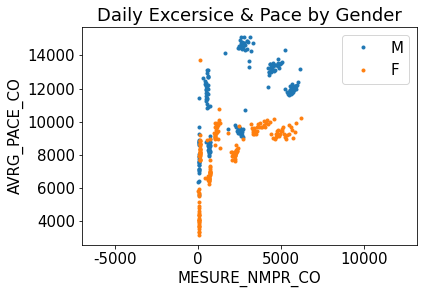

In [ ]:
plt.plot(Walking_m['MESURE_NMPR_CO'], Walking_m['AVRG_PACE_CO'],'.' )
plt.plot(Walking_f['MESURE_NMPR_CO'], Walking_f['AVRG_PACE_CO'],'.' )
plt.legend(['M', 'F'])
plt.axis('equal')
plt.xlabel('MESURE_NMPR_CO')
plt.ylabel('AVRG_PACE_CO')
plt.title('Daily Excersice & Pace by Gender')

#10. 국민건강보험공단_건강검진정보

In [ ]:
import os
os.chdir('/content/drive/MyDrive/General Data Language/data/CheXpert')

health = pd.read_csv('국민건강보험공단_건강검진정보.csv', encoding='cp949')
health

,기준년도,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,41,2.0,5.0,160.0,50.0,62.0,1.0,1.0,1,1,91.0,33.0,92.0,NaN,NaN,NaN,NaN,12.8,1,0.8,16.0,8.0,9.0,1.0,NaN,0,NaN,NaN,20210929
1,2020,41,2.0,8.0,160.0,70.0,88.0,1.0,1.0,1,1,128.0,84.0,88.0,NaN,NaN,NaN,NaN,13.4,1,0.8,27.0,25.0,42.0,1.0,1.0,0,NaN,NaN,20210929
2,2020,41,1.0,12.0,160.0,70.0,92.0,1.0,1.0,1,1,134.0,84.0,93.0,NaN,NaN,NaN,NaN,15.7,1,0.8,24.0,18.0,59.0,2.0,1.0,0,NaN,NaN,20210929
3,2020,41,2.0,8.0,160.0,65.0,78.0,1.0,1.0,1,1,116.0,73.0,93.0,NaN,NaN,NaN,NaN,15.3,1,0.8,32.0,24.0,23.0,1.0,1.0,0,NaN,NaN,20210929
4,2020,41,1.0,14.0,160.0,55.0,77.0,1.0,1.0,1,1,130.0,82.0,103.0,NaN,NaN,NaN,NaN,13.7,1,0.8,22.0,21.0,32.0,2.0,1.0,0,NaN,NaN,20210929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,2020,43,2.0,12.0,155.0,50.0,71.0,1.2,1.0,1,1,122.0,79.0,95.0,NaN,NaN,NaN,NaN,13.4,1,0.7,18.0,17.0,28.0,1.0,NaN,0,NaN,NaN,20210929
999995,2020,43,2.0,12.0,160.0,55.0,75.5,0.7,0.9,1,1,129.0,85.0,95.0,NaN,NaN,NaN,NaN,14.9,1,0.7,20.0,17.0,21.0,1.0,NaN,1,0.0,0.0,20210929
999996,2020,26,2.0,10.0,155.0,50.0,72.0,1.2,1.2,1,1,108.0,61.0,95.0,NaN,NaN,NaN,NaN,12.9,1,0.6,27.0,17.0,16.0,1.0,NaN,0,NaN,NaN,20210929
999997,2020,27,1.0,7.0,180.0,65.0,72.0,1.5,1.5,1,1,134.0,78.0,95.0,NaN,NaN,NaN,NaN,15.7,1,1.0,34.0,17.0,10.0,1.0,1.0,0,NaN,NaN,20210929


In [ ]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   기준년도          999999 non-null  int64  
 1   시도코드          999999 non-null  int64  
 2   성별코드          999972 non-null  float64
 3   연령대 코드(5세단위)  999972 non-null  float64
 4   신장(5Cm단위)     999933 non-null  float64
 5   체중(5Kg 단위)    999838 non-null  float64
 6   허리둘레          999387 non-null  float64
 7   시력(좌)         999913 non-null  float64
 8   시력(우)         999914 non-null  float64
 9   청력(좌)         999999 non-null  int64  
 10  청력(우)         999999 non-null  int64  
 11  수축기 혈압        999992 non-null  float64
 12  이완기 혈압        999991 non-null  float64
 13  식전혈당(공복혈당)    999998 non-null  float64
 14  총 콜레스테롤       0 non-null       float64
 15  트리글리세라이드      0 non-null       float64
 16  HDL 콜레스테롤     0 non-null       float64
 17  LDL 콜레스테롤     0 non-null       float64
 18  혈색소 

In [ ]:
health.describe()

,기준년도,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
count,999999.0,999999.000000,999972.000000,999972.000000,999933.000000,999838.000000,999387.000000,999913.000000,999914.000000,999999.0,999999.0,999992.000000,999991.00000,999998.000000,0.0,0.0,0.0,0.0,999992.000000,999999.0,999998.000000,999999.000000,999999.000000,999997.000000,999881.000000,656302.0,999999.000000,389229.000000,389228.000000,999999.0
mean,2020.0,33.804670,1.575320,9.900867,161.819672,61.659899,79.114202,0.981697,0.979449,1.0,1.0,120.850801,74.77332,98.438261,NaN,NaN,NaN,NaN,14.040587,1.0,0.796762,23.345720,20.846479,28.355401,1.310711,1.0,0.389231,0.193570,0.559741,20210929.0
std,0.0,12.503113,0.494295,2.964679,8.987481,12.503510,10.322411,0.526500,0.524265,0.0,0.0,14.321390,9.83935,20.316725,NaN,NaN,NaN,NaN,1.468311,0.0,0.184360,14.339875,18.657275,37.056879,0.462785,0.0,0.487576,0.395096,0.570716,0.0
min,2020.0,11.000000,1.000000,4.000000,10.000000,20.000000,22.000000,0.100000,0.100000,1.0,1.0,66.000000,16.00000,9.000000,NaN,NaN,NaN,NaN,0.600000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,20210929.0
25%,2020.0,27.000000,1.000000,7.000000,155.000000,50.000000,72.000000,0.800000,0.800000,1.0,1.0,110.000000,68.00000,89.000000,NaN,NaN,NaN,NaN,13.100000,1.0,0.800000,18.000000,14.000000,14.000000,1.000000,1.0,0.000000,0.000000,0.000000,20210929.0
50%,2020.0,41.000000,2.000000,10.000000,160.000000,60.000000,79.000000,1.000000,1.000000,1.0,1.0,120.000000,74.00000,95.000000,NaN,NaN,NaN,NaN,14.000000,1.0,0.800000,21.000000,16.000000,19.000000,1.000000,1.0,0.000000,0.000000,1.000000,20210929.0
75%,2020.0,43.000000,2.000000,12.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.0,1.0,130.000000,80.00000,103.000000,NaN,NaN,NaN,NaN,15.100000,1.0,0.800000,25.000000,22.000000,29.000000,2.000000,1.0,1.000000,0.000000,1.000000,20210929.0
max,2020.0,49.000000,2.000000,18.000000,200.000000,210.000000,999.000000,9.900000,9.900000,1.0,1.0,250.000000,170.00000,810.000000,NaN,NaN,NaN,NaN,25.000000,1.0,39.200000,2740.000000,3192.000000,1138.000000,2.000000,1.0,1.000000,1.000000,2.000000,20210929.0


In [ ]:
health[['수축기 혈압', '이완기 혈압']].value_counts()

수축기 혈압  이완기 혈압
110.0   70.0      31763
120.0   80.0      23810
130.0   80.0      20125
100.0   60.0      12901
120.0   70.0      11315
                  ...  
161.0   116.0         1
        120.0         1
        123.0         1
        128.0         1
66.0    39.0          1
Length: 6125, dtype: int64

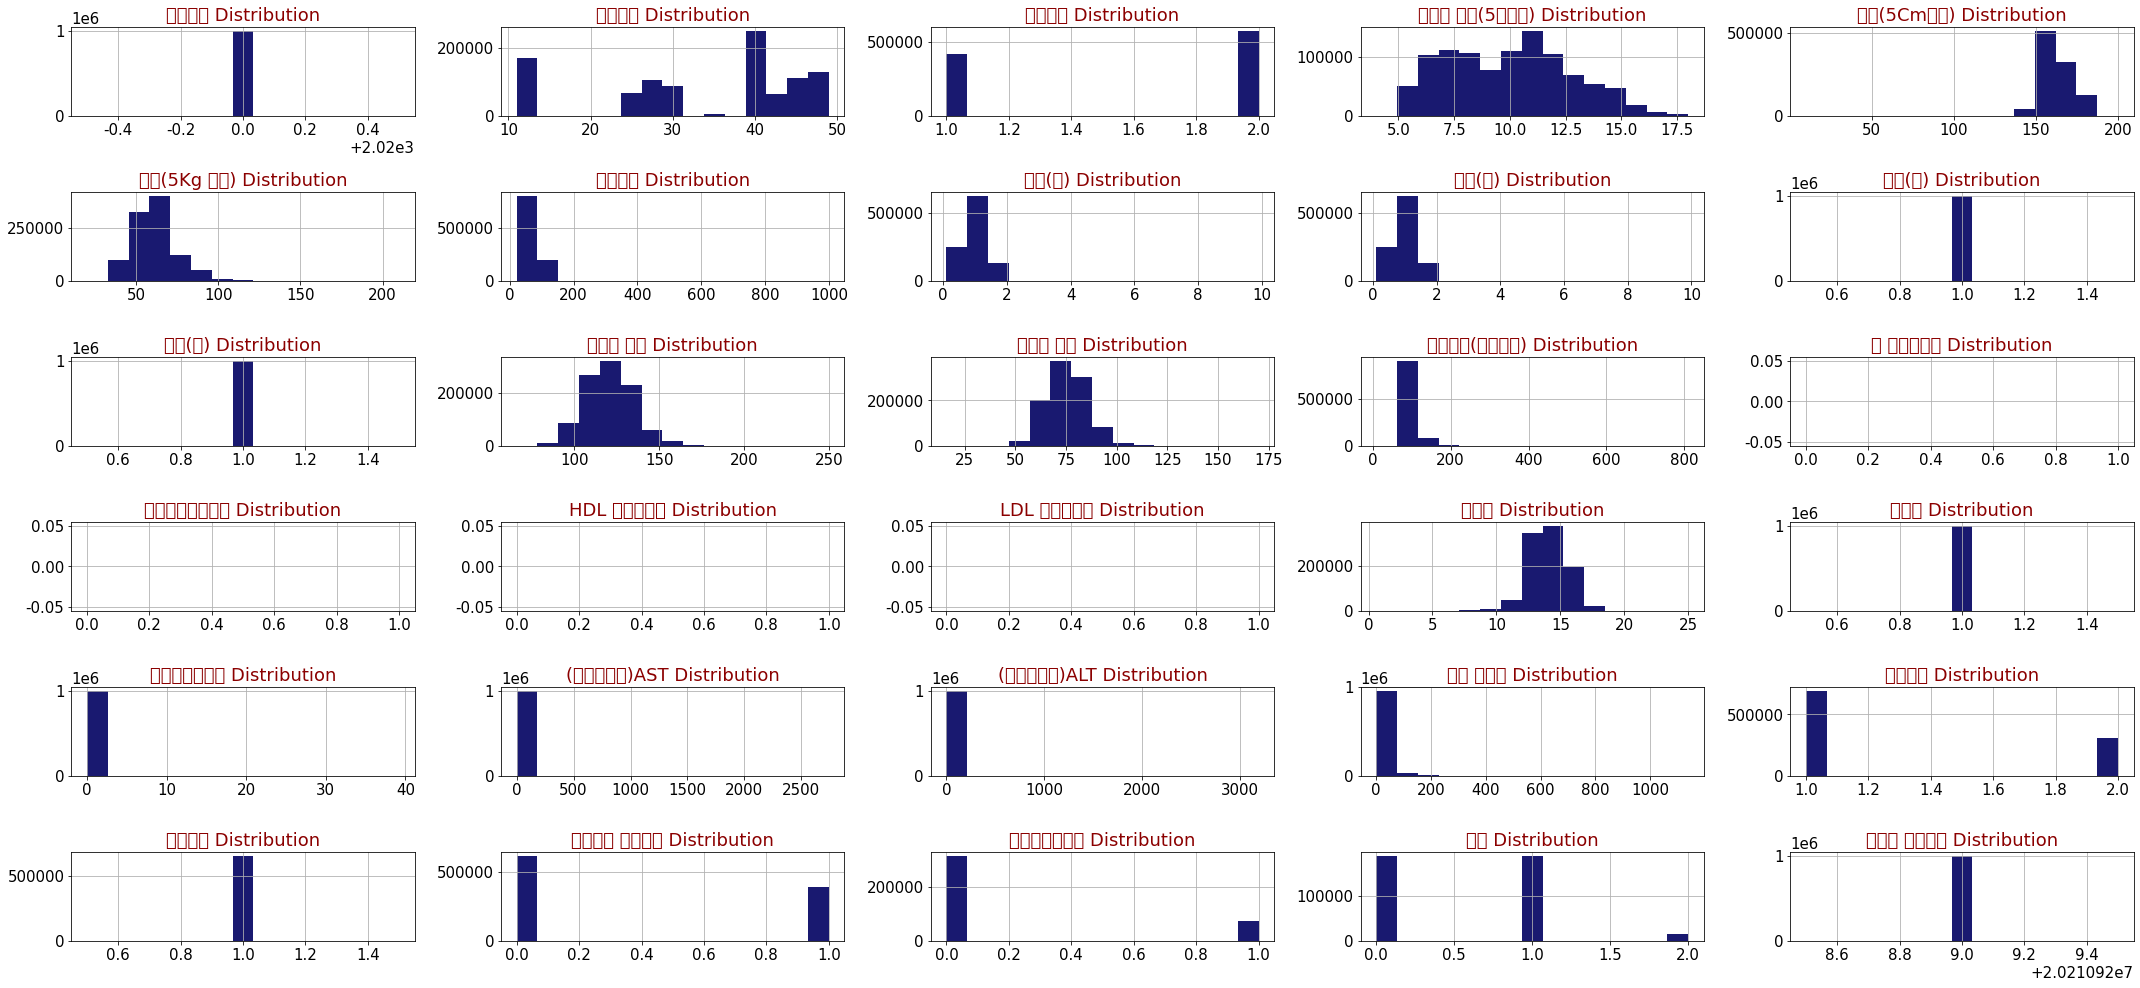

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,18))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=15,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(health,health.columns,8,5)